## Project 01

**Henrique Medeiros Dos Reis**

**DSCI 35600 - Machine Learning**

## Part A: Import Packages and Load Dataset

In the cell below, import the following packages using the standard aliases: `numpy`, `matplotlib.pyplot`, and `pandas`. Also import the following classes and functions from `sklearn`: `train_test_split`, `LogisticRegression`, `KNeighborsClassifier`, `DecisionTreeClassifier`, `RandomForestClassifier`, `StandardScaler`, and `OneHotEncoder`.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

Use `pandas` to load the contents of the tab-separated file `hw_11_data.txt` into a dataframe called `df`. Display the first 10 rows of this dataframe.

In [2]:
df = pd.read_csv('Project01_data.txt', sep='\t')
df.head(10)

,F1,F2,F3,F4,F5,y
0,15.69,-0.771,550.880459,P,D,0
1,-16.81,1.959,588.523801,Q,C,3
2,21.09,-1.550,660.881834,P,B,2
3,15.64,-1.623,374.414543,Q,C,0
4,14.25,1.426,446.714120,Q,B,0
5,21.54,1.231,525.126448,P,D,2
6,-14.05,1.608,343.264320,P,B,3
7,-21.52,-1.858,549.753447,Q,B,1
8,12.31,-0.941,507.148376,Q,D,0
9,-24.83,-1.940,627.040100,Q,B,1


Your goal in this assignment will be to use features F1 - F6 to predict one of four possible values for y: 0, 1, 2, or 3. 

## Part B: Preparing the Data

In the cell below, create the following arrays:

* `X_num` should contain the columns of `df` associated with numerical variables. 
* `X_cat` should contain the columns of `df` associated with categorical variables. 
* `y` should be a 1D array contain the values of the label, `y`. 

Print the shapes of these three arrays.

In [3]:
X_num = df.iloc[:,0:3].values
X_cat = df.iloc[:,3:5].values
y = df.iloc[:,5].values

print(X_num.shape)
print(X_cat.shape)
print(y.shape)


(467, 3)
(467, 2)
(467,)


#### Numerical Features
Split `Xnum` into training and validation sets called `X_num_train` and `X_num_val`. Use an 80/20 split, and set `random_state=1`. 

Then use the `StandardScaler` class to scale the numerical data. Name the resulting arrays `X_sca_train` and `X_sca_val`. Print the shape of these two arrays. 

In [4]:
X_num_train, X_num_val, y_train, y_num_val = train_test_split(X_num, y, test_size=0.2, random_state=1)
X_num_val, X_test, y_val, y_test = train_test_split(X_num_val, y_num_val, test_size=0.5, random_state=1)

s_scaler = StandardScaler()

X_sca_train = s_scaler.fit_transform(X_num_train)
X_sca_val = s_scaler.fit_transform(X_num_val)
print(X_num_train.shape)
print(X_num_val.shape)

(373, 3)
(47, 3)


#### Categorical Features

Use the `OneHotEncoder` class to encode the categorical feature array (setting `sparse=False`). Store the results in an array called `X_enc`. 

Split `X_enc` into training and validation sets called `X_enc_train` and `X_enc_val`. Use an 80/20 split, and set `random_state=1`. Print the shapes of these two arrays.

In [5]:

enc = OneHotEncoder(sparse=False)
X_enc = enc.fit_transform(X_cat)
print(X_enc.shape)

X_enc_train, X_enc_val, y_train, y_enc_val = train_test_split(X_enc, y, test_size=0.2, random_state=1)
X_enc_val, X_test, y_val, y_test = train_test_split(X_enc_val, y_enc_val, test_size=0.5, random_state=1)

(467, 6)


#### Combine Numerical and Categorial Features

Use `np.hstack()` to combine `X_sca_train` and `X_enc_train` into an array called `X_train`. Then combine `X_sca_val` and `X_enc_val` into an array called `X_val`. Print the shapes of the two new arrays.

In [6]:
X_train = np.hstack([X_sca_train, X_enc_train])
X_val = np.hstack([X_sca_val, X_enc_val])
print(X_train.shape)
print(X_val.shape)

(373, 9)
(47, 9)


## Part C: Logistic Regression Model

In the cell below, create and fit several logistic regression models, each with a different value for the regularization parameter `C`. In particular, consider 100 models with `C=10**k`, where `k` ranges from -4 to 0. For each model, log the training and validation accuracies in separate lists, and then plot these lists against `k`. Display a legend for your plot. 

Set `solver='lbfgs'` and `multi_class='ovr'` when creating your logistic regression models. 

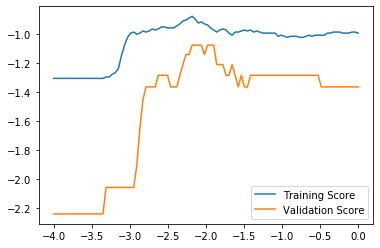

In [7]:
tr_score = []
va_score = []

exp_list = np.linspace(-4,0, 100)

for k in exp_list:
    model = LogisticRegression(solver='lbfgs', C=10**k, multi_class = 'ovr')
    model.fit(X_train, y_train)
    
    tr_score.append(np.log(model.score(X_train, y_train)))
    va_score.append(np.log(model.score(X_val, y_val)))
        
plt.figure(figsize=([6,4]))
plt.plot(exp_list, tr_score, label='Training Score')
plt.plot(exp_list, va_score, label='Validation Score')
plt.legend()
plt.show()

Use `np.argmax` to find the value of `k` that results in the largest validation accuracy. Print this result.

In [8]:
idx = np.argmax(va_score)
print(exp_list[idx])

-2.1818181818181817


Create a logistic regression model using the previously determined value for the regularization parameter. Print the training and validation accuracies for this model, clearly indicating which is which.

In [9]:
model = LogisticRegression(solver='lbfgs', C = idx, multi_class = 'ovr')
model.fit(X_train, y_train)

print('Training Accuracy:  ', model.score(X_train, y_train))
print('Validation Accuracy:', model.score(X_val, y_val))

Training Accuracy:   0.3753351206434316
Validation Accuracy: 0.2765957446808511


## Part D: Decision Tree Model

In the cell below, create and fit several decision tree models, each with a different value for the `max_depth` parameter. In particular, consider models for every value of max_depth from 1 to 20. For each model, log the training and validation accuracies in separate lists, and then plot these lists against the max depth. Display a legend for your plot. 

Set a seed of 1 prior to training each of your models. This should be inside of your loop. 

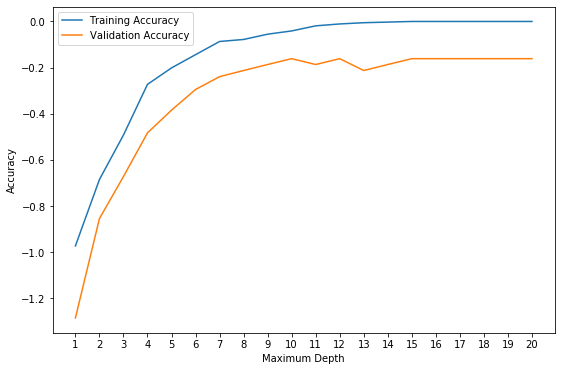

In [10]:
tr_acc = []
va_acc = []

rng = range(1,21)

for d in rng:
    np.random.seed(1)
    model1 = DecisionTreeClassifier(max_depth=d, criterion='gini', random_state=1)
    model1.fit(X_train, y_train)
    tr_acc.append(np.log(model1.score(X_train, y_train)))
    va_acc.append(np.log(model1.score(X_val, y_val)))

plt.figure(figsize=([9, 6]))
plt.plot(rng, tr_acc, label='Training Accuracy')
plt.plot(rng, va_acc, label='Validation Accuracy')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.xticks(rng)
plt.legend()
plt.show()

Use `np.argmax` to find the value of `max_depth` that results in the largest validation accuracy. Print this result. 

In [18]:
idx = np.argmax(va_acc)
print(exp_list[idx])

-3.2323232323232323


Create a tree model using the previously determined value of `max_depth`. Print the training and validation accuracies for this model, clearly indicating which is which.

Set a seed of 1 at the beginning of this cell.

In [19]:
np.random.seed(1)
model1 = DecisionTreeClassifier(max_depth=idx, criterion='gini', random_state=1)
model1.fit(X_train, y_train)

print('Training Accuracy:  ', model1.score(X_train, y_train))
print('Validation Accuracy:', model1.score(X_val, y_val))

Training Accuracy:   1.0
Validation Accuracy: 0.851063829787234


## Part E: Random Forest Model

In the cell below, create and fit several random forest models, each with a different value for the `max_depth` parameter. In particular, consider models for every value of max_depth from 1 to 20. Set `n_estimators=200` for each model. After training each model, log the training and validation accuracies in seperate lists, and then plot these lists against the max depth. Label your axes, and display a legend for your plot. 

Set a seed of 1 prior to training each of your models. This should be inside of your loop. 

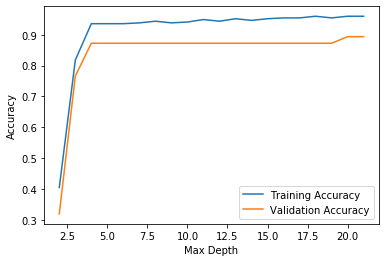

20


In [31]:
tr_acc = []
va_acc = []
max_nodes_list = range(2,22)

np.random.seed(1)
for d in max_nodes_list:
    rf_mod = RandomForestClassifier(n_estimators=200, max_leaf_nodes=d)
    rf_mod.fit(X_train, y_train)
    tr_acc.append(rf_mod.score(X_train, y_train))
    va_acc.append(rf_mod.score(X_val, y_val))
    
plt.figure(figsize=([6,4]))
plt.plot(max_nodes_list, tr_acc, label='Training Accuracy')
plt.plot(max_nodes_list, va_acc, label='Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

idx = np.argmax(va_acc)
best_max = max_nodes_list[idx]
print(best_max)

Use `np.argmax` to find the value of `max_depth` that results in the largest validation accuracy. Print this result. 

In [25]:
max_depth = np.argmax(va_acc)
print(exp_list[max_depth])

-3.2323232323232323


Create a random forest model using the previously determined value of `max_depth` and `n_estimators=200`. Print the training and validation accuracies for this model, clearly indicating which is which.

Set a seed of 1 at the beginning of this cell.

In [26]:
np.random.seed(1)
rf_mod = RandomForestClassifier(n_estimators=200, max_leaf_nodes=200, 
                                bootstrap='True', oob_score=True)


rf_mod.fit(X_train, y_train)

print('Out of bag score:', rf_mod.oob_score_)

print('Training Accuracy:  ', rf_mod.score(X_train, y_train))
print('Validation Accuracy:', rf_mod.score(X_val, y_val))

Out of bag score: 0.9142091152815014
Training Accuracy:   1.0
Validation Accuracy: 0.8936170212765957


## Part F: Summary

Print the validation accuracies for each of the three models, clearly indicating which is which. 

In [27]:
print('Validation Accuracy - Logistic Regression Model:', model.score(X_val, y_val))
print('Validation Accuracy - Decision Tree Model:', model1.score(X_val, y_val))
print('Validation Accuracy - Random Forest Model:', rf_mod.score(X_val, y_val))

Validation Accuracy - Logistic Regression Model: 0.8297872340425532
Validation Accuracy - Decision Tree Model: 0.851063829787234
Validation Accuracy - Random Forest Model: 0.8936170212765957
